# Parkinson Disease Prediction

In [50]:
#Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import seaborn as sns

In [51]:
d1= pd.read_csv(r"C:\Users\Gaurav\Downloads\archive.csv")

In [52]:
#drop name from the dataset because it is of no use..
d= d1.drop(["name"], axis=1)

In [53]:
#head is used to see first 5 rows of the dataset
d.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [54]:
#here we are checking for the null values  
d.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [55]:
#normal info data type 
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [56]:

#The average (mean) value
#std - The standard deviation.
"""
min - the minimum value,
25% - The 25% percentile*,
50% - The 50% percentile*,
75% - The 75% percentile*,
max - the maximum value"""

d.describe

<bound method NDFrame.describe of      MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394  

In [57]:
#correlation between the variables
d.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


array([[<AxesSubplot:title={'center':'MDVP:Fo(Hz)'}>,
        <AxesSubplot:title={'center':'MDVP:Fhi(Hz)'}>,
        <AxesSubplot:title={'center':'MDVP:Flo(Hz)'}>,
        <AxesSubplot:title={'center':'MDVP:Jitter(%)'}>,
        <AxesSubplot:title={'center':'MDVP:Jitter(Abs)'}>],
       [<AxesSubplot:title={'center':'MDVP:RAP'}>,
        <AxesSubplot:title={'center':'MDVP:PPQ'}>,
        <AxesSubplot:title={'center':'Jitter:DDP'}>,
        <AxesSubplot:title={'center':'MDVP:Shimmer'}>,
        <AxesSubplot:title={'center':'MDVP:Shimmer(dB)'}>],
       [<AxesSubplot:title={'center':'Shimmer:APQ3'}>,
        <AxesSubplot:title={'center':'Shimmer:APQ5'}>,
        <AxesSubplot:title={'center':'MDVP:APQ'}>,
        <AxesSubplot:title={'center':'Shimmer:DDA'}>,
        <AxesSubplot:title={'center':'NHR'}>],
       [<AxesSubplot:title={'center':'HNR'}>,
        <AxesSubplot:title={'center':'status'}>,
        <AxesSubplot:title={'center':'RPDE'}>,
        <AxesSubplot:title={'center':'DFA'}>,

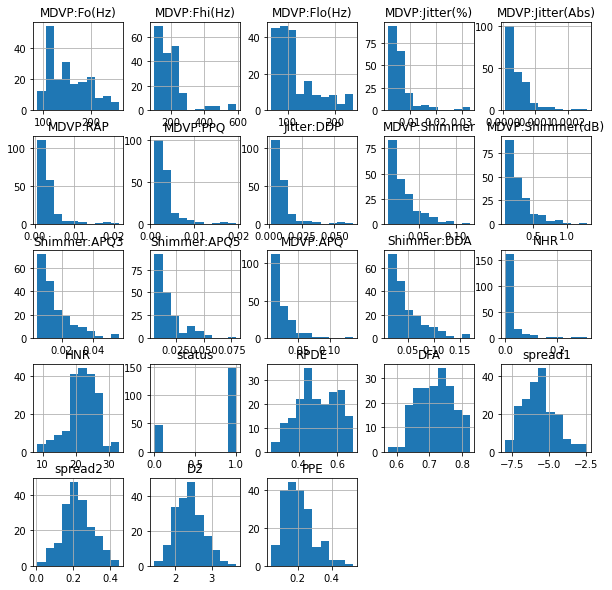

In [58]:
#plotting the variables
d.hist(figsize=(10,10))

<AxesSubplot:>

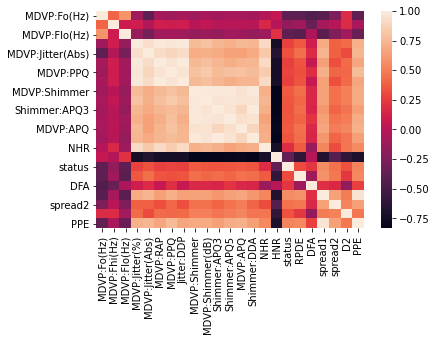

In [59]:
#correlation map ....always heatmap is used for correlation 
sns.heatmap(d.corr())

In [60]:
# count of target variable(status) 
d["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

In [61]:
#dropping status 
x = d.drop(["status"],axis=1)

In [62]:
x

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [63]:
#y is our target variable(value 0 or 1 (0 is healthy and 1 for PD))
y=d["status"]

In [64]:
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [65]:

x.shape

(195, 22)

In [66]:
y.shape

(195,)

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
#importing MinMaxScaler is standardize the values
scaler = MinMaxScaler()

In [69]:
#implementing minmaxScaler()
x_scaled= scaler.fit_transform(x)

In [70]:
x_scaled

array([[0.18430827, 0.11259173, 0.05481479, ..., 0.58576513, 0.39066128,
        0.4973096 ],
       [0.19832685, 0.09493044, 0.2783228 , ..., 0.74133704, 0.47314522,
        0.67132602],
       [0.16503854, 0.05912816, 0.26528838, ..., 0.68637091, 0.40881938,
        0.59668246],
       ...,
       [0.50273036, 0.28141298, 0.05072714, ..., 0.34257652, 0.55896743,
        0.18057983],
       [0.6428929 , 0.60180655, 0.05427936, ..., 0.45288473, 0.31822198,
        0.16313677],
       [0.73327434, 0.32279413, 0.07194837, ..., 0.41509481, 0.50367281,
        0.21545975]])

In [71]:
#for data modelling we are splitting data into training and testing
x_train , x_test , y_train , y_test = train_test_split(x_scaled,y,random_state=0)

In [72]:
x_train.shape

(146, 22)

In [73]:
x_test.shape

(49, 22)

In [74]:
y_train.shape

(146,)

In [75]:
y_test.shape

(49,)

In [76]:
#import libraries for implementing ML models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [77]:
#fitting the data into logistic regression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [78]:
#predicting the values
lr.predict(x_test)

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1], dtype=int64)

In [104]:
#accuracy in LogisticRegression model
pred1 = accuracy_score(y_test,lr.predict(x_test))
pred1

0.8979591836734694

In [123]:
f1_lr = f1_score(y_test, lr.predict(x_test))
f1_lr

0.935064935064935

In [105]:
accuracy_score(y_train,lr.predict(x_train))

0.8493150684931506

In [99]:
#fitting the data into KNN model
knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(x_train,y_train)


KNeighborsClassifier()

In [100]:
#predicting values
knn_classifier.predict(x_test)

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1], dtype=int64)

In [83]:
#accuracy into KNN model
knn_classifier.score(x_test,y_test)

0.8775510204081632

In [124]:
f1_knn = f1_score(y_test, knn_classifier.predict(x_test))
f1_knn

0.918918918918919

In [84]:
#accuracy in knn model
knn_classifier.score(x_train,y_train)

0.9726027397260274

In [129]:
#fliting data into decision tree
dT = DecisionTreeClassifier()
dT.fit(x_train, y_train)

DecisionTreeClassifier()

In [130]:
dT.score(x_test, y_test)

0.8775510204081632

In [131]:
f1_dT = f1_score(y_test, dT.predict(x_test))
f1_dT

0.918918918918919

In [85]:
# fiiting data into RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
Rn= RandomForestClassifier()
Rn.fit(x_train,y_train)

RandomForestClassifier()

In [86]:
Rn.score(x_train,y_train)

1.0

In [102]:
pred2= Rn.score(x_test,y_test)
pred2

0.9183673469387755

In [126]:
f1_Rn = f1_score(y_test, Rn.predict(x_test))
f1_Rn

0.9473684210526315

In [88]:
from sklearn.metrics import confusion_matrix

In [89]:
y_pred = Rn.predict(x_test)

In [90]:
#confusion_matrix for randam Forest
cm = confusion_matrix(y_test , y_pred)
print(cm)

[[ 9  2]
 [ 2 36]]


In [91]:
#fitting into XG boost classifier
!pip install xgboost
from xgboost import XGBClassifier
xgb =  XGBClassifier(random_state = 0)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [92]:
y_pred = xgb.predict(x_test)

In [93]:
#XGB training result
xgb.score(x_train,y_train)

1.0

In [106]:
#XGB testing result
pred3 = xgb.score(x_test,y_test)
pred3

0.9591836734693877

In [127]:
f1_xgb = f1_score(y_test, xgb.predict(x_test))
f1_xgb

0.972972972972973

In [95]:
#fitting data into SVM
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [96]:
#SVC training result
svc.score(x_train,y_train)

0.8835616438356164

In [97]:
#SVC training result
svc.score(x_test,y_test)

0.9387755102040817

In [128]:
f1_svc = f1_score(y_test, svc.predict(x_test))
f1_svc

0.9620253164556963

In [110]:
pred_final = (pred1+pred2+pred3)/3.0
pred_final

0.9251700680272109

In [114]:
from sklearn.ensemble import GradientBoostingClassifier

#boosting model (e.g. GradientBoostingClassifier)
boosting_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)

In [118]:
# Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(boosting_clf, param_grid={'n_estimators': np.arange(50, 201, 50), 'learning_rate': np.arange(0.01, 0.11, 0.02)}, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)

# Best model and score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_
accuracy_score(y_test, grid_search.predict(x_test))

0.9183673469387755